# 이항분포와 푸아송 분포

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## 이항분포

In [10]:
sp.stats.binom.pmf(k=[0,1,2],n=2,p=0.5)

array([0.25, 0.5 , 0.25])

In [11]:
sp.stats.binom.rvs(n=10, p=0.2, size=5) #동전을 10번 던져서 앞면이 나오는 시행을 하여 나온 횟수를 얻음. 이를 5번 시행

array([2, 2, 1, 2, 3])

In [12]:
np.arange(0,10,1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### n=10, p=0.2인 이항분포

In [30]:
binomial = sp.stats.binom(n=10, p=0.2)

In [31]:
random_value = binomial.rvs(size=10000)
random_value

array([4, 0, 2, ..., 2, 2, 2])

In [32]:
# sns.distplot? #

In [33]:
m = np.arange(0,11,1)

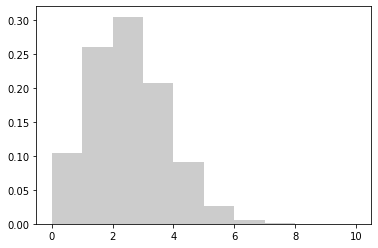

In [34]:
sns.distplot(random_value, bins=m, kde=False, norm_hist = True, color='gray')

In [35]:
pmf_binomial = binomial.pmf(k=m)

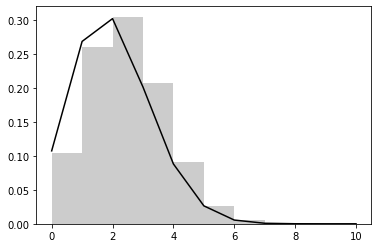

In [36]:
sns.distplot(random_value, bins=m, kde=False, norm_hist = True, color='gray')
plt.plot(m, pmf_binomial, color='black')

#### size가 크므로 두 그래프가 거의 일치해보임

### n이 커질 때 이항분포의 변화살펴보기
- $p=0.2$

In [53]:
def mybinom(myn=10,color='black'):
    """횟수 n을 받아서 그래프 반환"""
    m = np.arange(0,myn+1,1)
    mypmf = sp.stats.binom(myn, p=0.2).pmf(k=m)
    return plt.plot(m, mypmf, color)

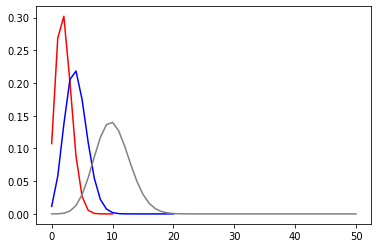

In [56]:
mybinom(10, 'red')
mybinom(20, 'blue')
mybinom(50, 'gray')

#### 결론:  n이 커질수록 정규분포와 닮아가며, 평균, 분산이 커짐

## 푸아송 분포
https://danbi-ncsoft.github.io/study/2019/07/15/poisson.html

In [37]:
sp.stats.poisson.pmf(k=2, mu=5) #평균이 5인 푸아송 분포에서 2회 실시되는 확률

0.08422433748856832

In [38]:
sp.stats.poisson.rvs(mu=2, size=5) # 평균이 2인 푸아송분포에서 5개의 난수를 얻음.

array([2, 4, 2, 2, 3])

### $\lambda =2 $인 푸아송분포

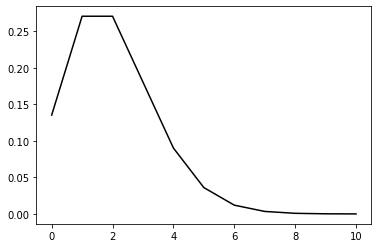

In [41]:
mypoisson = sp.stats.poisson(mu=2)
m=np.arange(0,11,1)
pmf_poisson = mypoisson.pmf(k=m)
plt.plot(m,pmf_poisson, color= 'black')

### $\lambda =2 $인 푸아송분포의 시뮬레이션

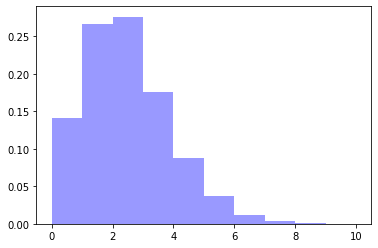

In [44]:
rvs_poisson = mypoisson.rvs(size=10000)
sns.distplot(rvs_poisson, bins=m, kde=False, norm_hist=True, color='blue')

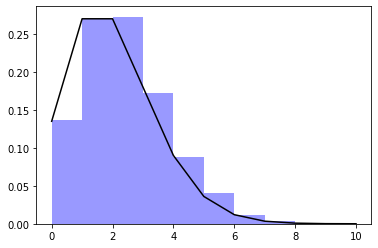

In [45]:
mypoisson = sp.stats.poisson(mu=2)
m=np.arange(0,11,1)
pmf_poisson = mypoisson.pmf(k=m)
plt.plot(m,pmf_poisson, color= 'black')
rvs_poisson = mypoisson.rvs(size=10000)
sns.distplot(rvs_poisson, bins=m, kde=False, norm_hist=True, color='blue')

In [58]:
def mypoi(myn,mcolor='black'):
    mypoisson= sp.stats.poisson(mu=2)
    m=np.arange(0,myn+1,1)
    pmf_poisson = mypoisson.pmf(k=m)
    return plt.plot(m,pmf_poisson, mcolor)


### 푸아송 분포에서 n이 커지고, p가 작아질 때 이항분포와의 비교
- $\lambda=2$로 일정, 

In [60]:
def mybinom2(myn=10,p=0.2,color='black'):
    """횟수 n, 확률p, color를 받아서 그래프 반환"""
    m = np.arange(0,myn+1,1)
    mypmf = sp.stats.binom(myn, p).pmf(k=m)
    return plt.plot(m, mypmf, color)

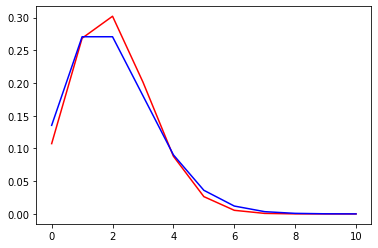

In [63]:
# 1. n=10, p=0.2 
mybinom2(10,color='red')
mypoi(10,'blue')


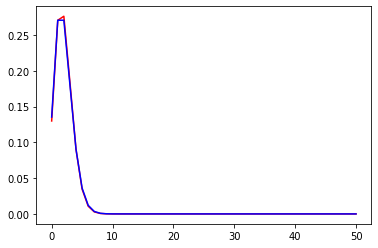

In [68]:
# 2. n=50, p=0.04 
mybinom2(50,p=0.04,color='red')
mypoi(50,'blue')

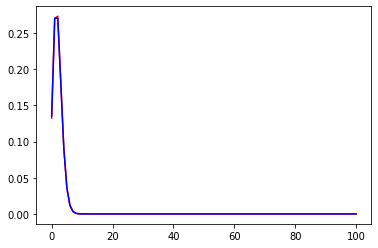

In [65]:
# 3. n=100, p=0.02 
mybinom2(100,p=0.02,color='red')
mypoi(100,'blue')

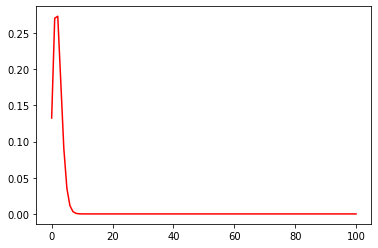

In [66]:
mybinom2(100,p=0.02,color='red')


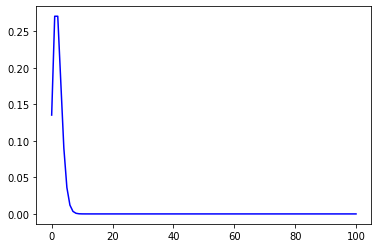

In [67]:
mypoi(100,'blue')

#### 결론: n이 커지고 p가 작아지면 이항분포와 포아송 분포가 거의 비슷하다.